### Artist tutorial

Using Artist objects to render on the canvas.

There are three layers to the matplotlib API.

- the matplotlib.backend_bases.FigureCanvas is the area onto which the figure is drawn
- the matplotlib.backend_bases.Renderer is the object which knows how to draw on the FigureCanvas
- and the matplotlib.artist.Artist is the object that knows how to use a renderer to paint onto the canvas.

The FigureCanvas and Renderer handle all the details of talking to user interface toolkits like wxPython or drawing languages like PostScript®, and the Artist handles all the high level constructs like representing and laying out the figure, text, and lines. The typical user will spend 95% of their time working with the Artists.

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure). The standard use is to create a Figure instance, use the Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives. In the example below, we create a Figure instance using matplotlib.pyplot.figure(), which is a convenience method for instantiating Figure instances and connecting them with your user interface or drawing toolkit FigureCanvas. As we will discuss below, this is not necessary -- you can work directly with PostScript, PDF Gtk+, or wxPython FigureCanvas instances, instantiate your Figures directly and connect them yourselves -- but since we are focusing here on the Artist API we'll let pyplot handle some of those details for us:

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

The Axes is probably the most important class in the matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods (plot(), text(), hist(), imshow()) to create the most common graphics primitives (Line2D, Text, Rectangle, AxesImage, respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested. Most of you are probably familiar with the Subplot, which is just a special case of an Axes that lives on a regular rows by columns grid of Subplot instances. If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:

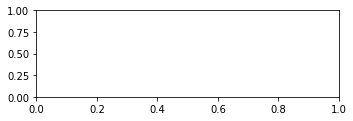

In [2]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

Continuing with our example:

In [3]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

In this example, ax is the Axes instance created by the fig.add_subplot call above (remember Subplot is just a subclass of Axes) and when you call ax.plot, it creates a Line2D instance and adds it to the Axes.lines list. In the interactive ipython session below, you can see that the Axes.lines list is length one and contains the same line that was returned by the line, = ax.plot... call:

In [4]:
ax.lines[0]

In [5]:
line

If you make subsequent calls to ax.plot (and the hold state is "on" which is the default) then additional lines will be added to the list. You can remove lines later simply by calling the list methods; either of these will work:

`del ax.lines[0]
ax.lines.remove(line)  # one or the other, not both!`

The Axes also has helper methods to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

In [6]:
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

When you call ax.set_xlabel, it passes the information on the Text instance of the XAxis. Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.

Try creating the figure below.

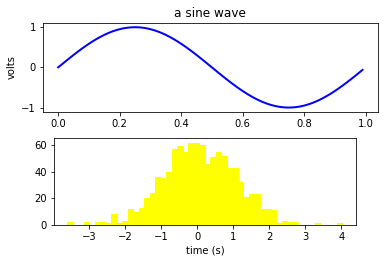

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()

In [8]:
ax = fig.add_subplot(111)
rect = ax.patch  # a Rectangle instance
rect.set_facecolor('green')
